<a href="https://colab.research.google.com/github/thaianh1210/DecisionTree/blob/main/DecisionTree_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math


<ipython-input-32-d8983f33f8be>:4: RuntimeWarning: divide by zero encountered in log2
  y = -x * np.log2(x) - (1-x) * np.log2(1-x)
<ipython-input-32-d8983f33f8be>:4: RuntimeWarning: invalid value encountered in multiply
  y = -x * np.log2(x) - (1-x) * np.log2(1-x)


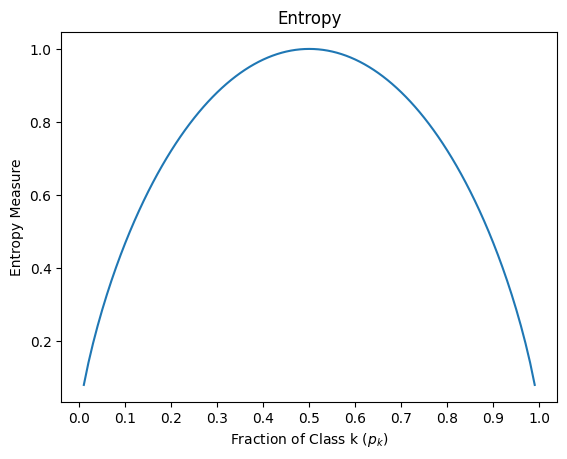

In [32]:
#A figure to show Entropy measures
plt.figure()
x = np.linspace(0.01, 1, 100)
y = -x * np.log2(x) - (1-x) * np.log2(1-x)
plt.plot(x,y)
plt.title('Entropy')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Entropy Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()

In [33]:
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no


In [34]:
def entropy(value_counts):
  n = value_counts.sum()
  p_sum = 0
  for key in value_counts.keys():
    p_sum -= (value_counts[key] / n) * np.log2(value_counts[key] / n)
  return p_sum

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

entropy_class = entropy(class_value_counts)
print(f'\nEnotrpy of the class is {entropy_class:.3f}')


Number of samples in each class is:
default
yes    9
no     5
Name: count, dtype: int64

Enotrpy of the class is 0.940


In [35]:
#Calculating Entropy for the attributes
def entropy_per_feature(feature_name):
  feature_values = df1[feature_name].value_counts()
  entropy_A = 0
  for key in feature_values.keys():
    df_k = df1[class_name][df1[feature_name] == key].value_counts()
    n_k = feature_values[key]
    n = df1.shape[0]
    entropy_A += (n_k / n) * entropy(df_k)
  return entropy_A

entropy_attribute ={}
for key in attribute_names:
    entropy_attribute[key] = entropy_per_feature(key)
    print(f'Entropy for {key} is {entropy_attribute[key]:.3f}')

Entropy for age is 0.694
Entropy for income is 0.911
Entropy for student is 0.788
Entropy for credit_rate is 0.892


In [36]:
#Calculate Information Gain
#Information Gain = Entropy[class_name] - Entropy[feature]

def information_gain(feature_name):
  gain = entropy_class - entropy_per_feature(feature_name)
  return gain
information_list = {}
for key in attribute_names:
  information_list[key] = information_gain(key)
  print(f'Information Gain for {key} is {information_list[key]:.3f}')

Information Gain for age is 0.247
Information Gain for income is 0.029
Information Gain for student is 0.152
Information Gain for credit_rate is 0.048


In [54]:
#We will get the highest value of Information Gain
max_value = max(information_list.values())
print(f'The maximum value of Information Gain : {max_value}')

max_attribute = [attribute for attribute, value in information_list.items() if value == max_value]
print(f'The chosen attribute for root node with maximum Information Gain is {max_attribute}')


The maximum value of Information Gain : 0.24674981977443933
The chosen attribute for root node with maximum Information Gain is ['age']


In [41]:
print(information_list)

{'age': 0.24674981977443933, 'income': 0.02922256565895487, 'student': 0.15183550136234159, 'credit_rate': 0.04812703040826949}
